<a href="https://colab.research.google.com/github/manishmawatwal/DataScience/blob/main/Image_Processing_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving apples.jpg to apples.jpg


In [37]:
import numpy as np
from numpy import random
from numpy import *
import pandas as pd
import cv2
import math
import matplotlib.pyplot as plt
from skimage.util import random_noise
import math

In [39]:
def addNoise(image, magnitude):
    temp = []
    for x in np.nditer(image):
        random = np.random.rand()
        if magnitude > random:
            x = np.random.random_integers(255)  #because randint and rand_range didn't work
        temp.append(x)
    temp = np.array(temp, dtype = np.uint8).reshape(image.shape[0], image.shape[1], image.shape[2])
    return temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 255 + 1) instead
  


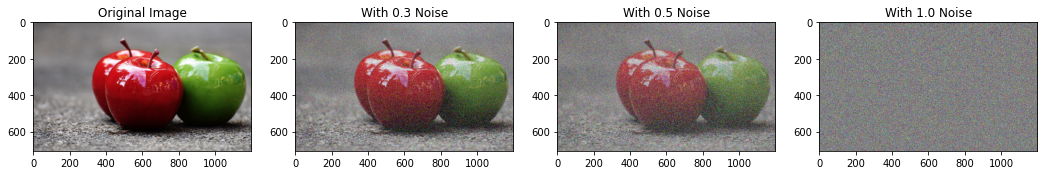

In [40]:
img=cv2.imread('apples.jpg')

fig,axs=plt.subplots(1,4,figsize=(18,15))

plt.subplot(141)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(142)
i=addNoise(img,0.3)
plt.title('With 0.3 Noise')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

plt.subplot(143)
i=addNoise(img,0.5)
plt.title('With 0.5 Noise')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

plt.subplot(144)
i=addNoise(img,1)
plt.title('With 1.0 Noise')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [41]:
def Brighten(image, magnitude):
    temp = []
    for x in np.nditer(image):
        x = x*magnitude
        if x > 255:
            x = 255
        temp.append(x)
    temp = np.array(temp, dtype = np.uint8).reshape(image.shape[0], image.shape[1], image.shape[2])
    return temp

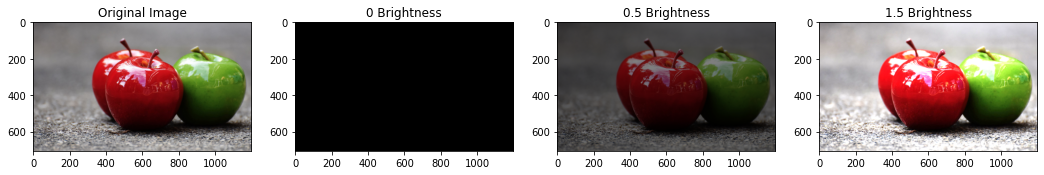

In [42]:
img = cv2.imread('apples.jpg')
fig, axs = plt.subplots(1, 4, figsize=(18, 15))
plt.subplot(141)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(142)
i = Brighten(img,0)
plt.title('0 Brightness')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

plt.subplot(143)
i=Brighten(img,0.5)
plt.title('0.5 Brightness')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

plt.subplot(144)
i=Brighten(img,1.5)
plt.title('1.5 Brightness')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [43]:
def ChangeContrast(image, magnitude):
    temp = []
    magnitude = magnitude*255 - 255
    f = (259*(255+magnitude)) / (255*(259 - magnitude))
    for x in np.nditer(image):
        x = f*(x - 128)+128
        temp.append(x)
    temp = np.array(temp, dtype = np.uint8).reshape(image.shape[0], image.shape[1], image.shape[2])
    return temp

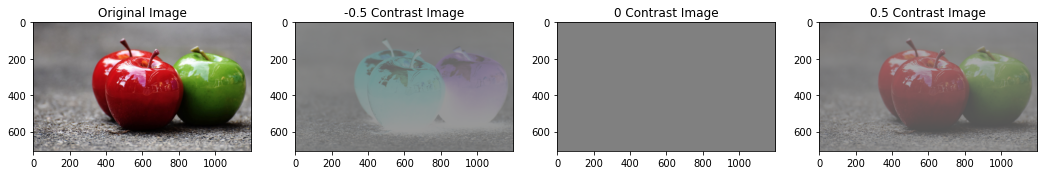

In [44]:
img = cv2.imread('apples.jpg')
fig,axs = plt.subplots(1,4,figsize=(18,15))

plt.subplot(141)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

i = ChangeContrast(img,-0.5)
plt.subplot(142)
plt.title('-0.5 Contrast Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

i=ChangeContrast(img,0)
plt.subplot(143)
plt.title('0 Contrast Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

i=ChangeContrast(img,0.5)
plt.subplot(144)
plt.title('0.5 Contrast Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [45]:
def get_gaussian_filter(sigma):
    filter_width = int(math.ceil(3*sigma)*2 + 1)
    x = filter_width // 2
    gaussian_filter = np.zeros((filter_width, filter_width))
    for i in range(-x, x+1):
        for j in range(-x, x+1):
            numerator = math.exp(-1*(i**2 + j**2)/(2*(sigma**2)))
            denominator = 2*math.pi*(sigma**2)
            gaussian_filter[i][j] = numerator / denominator
    return gaussian_filter

In [48]:
def Blur(image,magnitude):
  '''This function blurs the images'''
  sigma=magnitude
  gaussian_filter=get_gaussian_filter(sigma)
  blurred_image= np.zeros((image.shape[0]-gaussian_filter.shape[0], image.shape[1]-gaussian_filter.shape[0],image.shape[2]))
  for x in range(image.shape[0]-gaussian_filter.shape[0]):
    for y in range(image.shape[1]-gaussian_filter.shape[1]):
      for z in range(image.shape[2]):
        blurred_image[x,y,z]=(gaussian_filter * image[x: x+gaussian_filter.shape[0], y: y+gaussian_filter.shape[1],z]).sum()
  blurred_image=np.array(blurred_image,dtype=np.uint8)
  return blurred_image

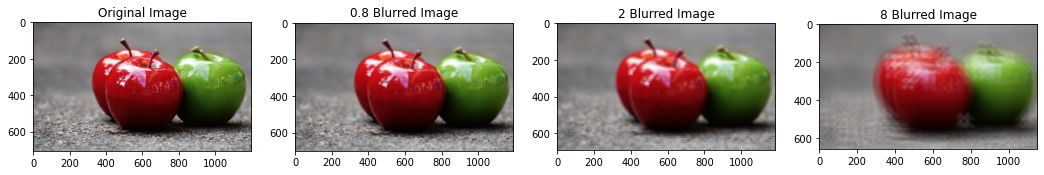

In [49]:
img=cv2.imread('apples.jpg')

fig,axs=plt.subplots(1,4,figsize=(18,15))

plt.subplot(141)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

i=Blur(img,0.8)
plt.subplot(142)
plt.title('0.8 Blurred Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

i=Blur(img,2)
plt.subplot(143)
plt.title('2 Blurred Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

i=Blur(img,8)
plt.subplot(144)
plt.title('8 Blurred Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [19]:
def Sharpen(image):
  #sigma=magnitude
  sharpen_filter=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
  image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2,image.shape[2]))
  image_padded[1:-1, 1:-1,:] = image
  sharpened_image= np.zeros((image.shape[0], image.shape[1],image.shape[2]))
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      for z in range(image.shape[2]):
        sharpened_image[x,y,z]=(sharpen_filter * image_padded[x: x+3, y:y+3,z]).sum()
  sharpened_image=np.array(sharpened_image,dtype=np.uint8)
  return sharpened_image

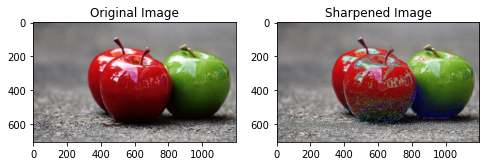

In [21]:
img=cv2.imread('apples.jpg')

fig,axs=plt.subplots(1,2,figsize=(8,6))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


i=Sharpen(img)
plt.subplot(122)
plt.title('Sharpened Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [22]:
def EdgeDetect(image):
  sharpen_filter=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) 
  image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2,image.shape[2]))
  image_padded[1:-1, 1:-1,:] = image
  sharpened_image= np.zeros((image.shape[0], image.shape[1],image.shape[2]))
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      for z in range(image.shape[2]):
        sharpened_image[x,y,z]=abs((sharpen_filter * image_padded[x: x+3, y:y+3,z]).sum())
  sharpened_image=np.array(sharpened_image,dtype=np.uint8)
  return sharpened_image

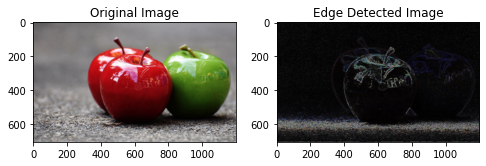

In [23]:
img=cv2.imread('apples.jpg')

fig,axs=plt.subplots(1,2,figsize=(8,6))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

i=EdgeDetect(img)
plt.subplot(122)
plt.title('Edge Detected Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
def Upscaling(image,scale):
  image_upscaled = np.zeros((image.shape[0] * scale, image.shape[1] * scale,image.shape[2]))
  i,j=0,0
  for x in range(image.shape[0]):
    j=0
    for y in range(image.shape[1]):
      for s in range(scale):
        image_upscaled[i+s,j+s,:]=image[x,y,:]
      j+=scale
    i+=scale
  image_upscaled=np.array(image_upscaled,dtype=np.uint8)
  return image_upscaled

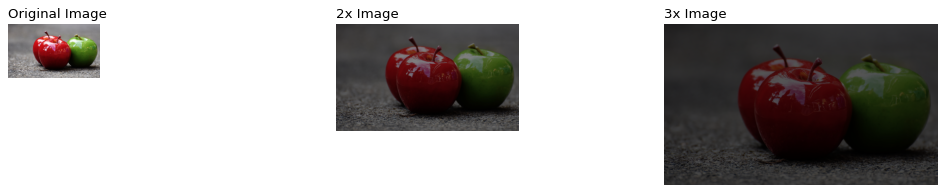

In [25]:
img=cv2.imread('apples.jpg')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), dpi=80, sharex=True, sharey=True)
fig.patch.set_visible(False)

ax[0].axis('off')
ax[0].set_title('Original Image',loc='left')
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


i=Upscaling(img,2)
ax[1].axis('off')
ax[1].set_title('2x Image',loc='left')
ax[1].imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

i=Upscaling(img,3)
ax[2].axis('off')
ax[2].set_title('3x Image',loc='left')
ax[2].imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [26]:
def Downsample(image,scale):
  image_downscaled = np.zeros((int(image.shape[0] * scale),int( image.shape[1] * scale),image.shape[2]))
  downscale_factor=int(1/scale)
  for x in range(image_downscaled.shape[0]):
    for y in range(image_downscaled.shape[1]):
      image_downscaled[x,y,:]=image[x*downscale_factor,y*downscale_factor,:]
  image_downscaled=np.array(image_downscaled,dtype=np.uint8)
  return image_downscaled

Original Image


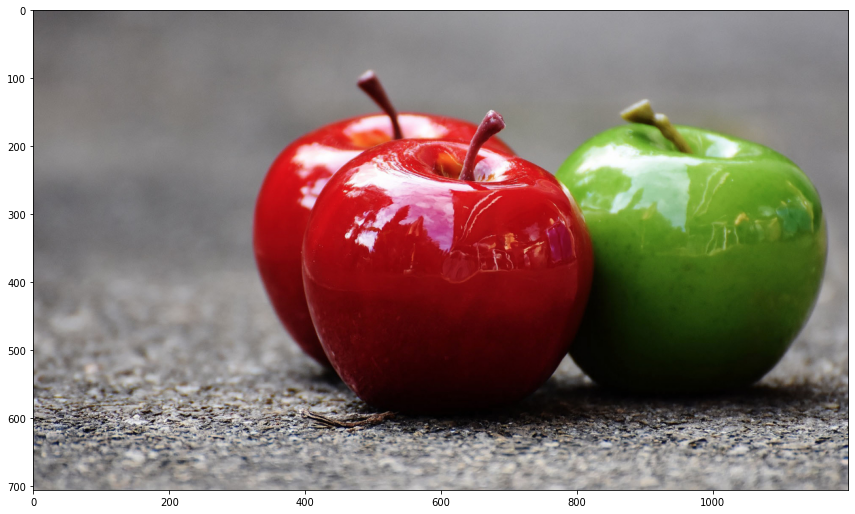

Downscale Image 2x


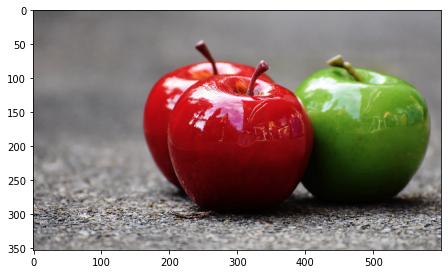

Downscale Image 3x


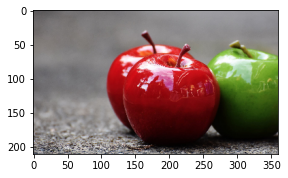

Downscale Image 5x


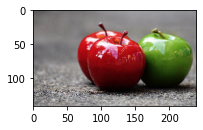

In [27]:
img=cv2.imread('apples.jpg')

figsize = img.shape[1]/80, img.shape[0]/80
fig = plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print('Original Image')
plt.show()

i=Downsample(img,0.5)
figsize = i.shape[1]/80, i.shape[0]/80
fig = plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
print('Downscale Image 2x')
plt.show()

i=Downsample(img,0.3)
figsize = i.shape[1]/80, i.shape[0]/80
fig = plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
print('Downscale Image 3x')
plt.show()

i=Downsample(img,0.2)
figsize = i.shape[1]/80, i.shape[0]/80
fig = plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
print('Downscale Image 5x')